In [1]:
from random import seed
from random import random
from math import exp
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
test_data_x = loadmat('ion.test')['Xtest'].T
test_data_y = loadmat('ion.test')['ytest']

train_data_x = loadmat('ion.trin')['Xtrain'].T
train_data_y = loadmat('ion.trin')['ytrain']

In [3]:
#Converting y's to one dimentional arrays
train_y = []
for j in range(len(train_data_y)):
    train_y.append(train_data_y[j][0])
    
test_y = []
for j in range(len(test_data_y)):
    test_y.append(test_data_y[j][0])

In [19]:
# build a neural network with one hidden layer and initialize it
def set_NN(x_n, y_n , neuron_n):
    NN = list()
    o_layer = [{'w':[random() for c in range(neuron_n + 1)]} for l in range(y_n)]
    h_layer = [{'w':[random() for c in range(x_n + 1)]} for l in range(neuron_n)]
    NN.append(h_layer)
    NN.append(o_layer)
    return NN

In [67]:
# Activaion function1 - sigmiod
def sigmoid(x):
    return (1.0 / (1.0 + np.exp(-x)))

In [20]:
'''
First step of training: forward propagation on each entry of input
and training all layers of NN
'''

def forward_propg(nn, x):
    inputl = x
    # For each layer of NN
    for layer in nn:
        outputl = []
        # For each Neuron of our layer
        for n in layer:
            # get the weights of the neuron
            beta = n['w']
            # last beta in the b0
            y_nrn = beta[-1]
            # Activate the neuron and calculate y
            for i in range(len(beta)-1):
                y_nrn += beta[i]*inputl[i]
            n['y'] =sigmoid(y_nrn)
            #Keep track of outputs and use them as the outputs for the next l
            outputl.append(n['y'])
        inputl = outputl
    return outputl

In [68]:
'''
Finding delta using expected value for y 
'''
def derivatie_sigmoid(x):
    return (np.exp(-x) / (1.0 + np.exp(-x))**2)

def back_propg_delta(nn, y):
    # updating delta starts from n-1 to 0
    num_layers = len(nn)
    
    for i in range(num_layers-1, -1, -1):
        layer = nn[i]
        len_layer = len(layer)
        
        # calculatig delta for last layer
        if i == (num_layers -1):
            for n in range(len_layer):
                nrn = layer[n]
                delta = -2*( y[n] - nrn['y'])
                nrn['delta'] = delta
        else:
            # calculatig delta for hidden layers
            for n in range(len_layer):
                err_sum = 0
                for nrn in nn[i+1]:
                    err_sum += nrn['w'][n]*nrn['delta']
                delta = derivatie_sigmoid(layer[n]['y'])*err_sum
                layer[n]['delta'] = delta    

In [41]:
def change_weight(nn, x, lrn_rate, w_decay):
    for l in range(len(nn)):
        if l == 0:
            z = x
        else:
            z = []
            for nrn in nn[l-1]:
                z.append(nrn['y'])
        for n in nn[l]:
            for j in range(len(z)):
                u = n['w'][j]
                #updating the weight using weight decay
                n['w'][j] = u - lrn_rate*n['delta']*z[j] - w_decay*lrn_rate*u

In [181]:
def train_NN(nn, data, exp_y, lrn_rate, w_decay, epoches, num_classes):
    error = 0
    for i in range(epoches):
        error = 0
        for j in range(len(data)):
            yi = forward_propg(nn, data[j])
            y_onehat = [0]*num_classes
            y=[0]*num_classes
            y[yi.index(max(yi))] =1
            y_onehat[exp_y[j]] = 1
            error += sum([(y_onehat[i]-y[i])**2 for i in range(len(y_onehat))])/2
            back_propg_delta(nn, y_onehat)
            change_weight(nn, data[j], lrn_rate, w_decay)
    return (error/(len(data)))   

In [237]:
seed(1)
data = train_data_x.tolist()
n_in = len(data[0]) 
n_out = 2
nn = set_NN(n_in, n_out, 8)
train_NN(nn, data, train_y, 0.1, 0, 50, n_out)
for l in nn:
    print(l)

[{'w': [2.3347989002766845, -31.897944347177322, -17.592269443814395, -32.601392479487764, -21.552651928451652, -8.501345725610813, -3.132787145090854, -14.893082346335147, -18.245160010803538, 15.846506115851973, -17.379728602707313, 5.945848265826949, -16.44717365663311, -5.32752888983668, -11.79659062903252, -4.338470028605721, -22.177380141773902, 8.083145612352663, 0.30680197137081283, 3.475966811667075, 33.872698802995245, 0.45581576711253724, -0.30257205325744657, -6.606148508717639, -14.859071692792904, 33.20653561395201, 12.099597740938417, 8.528198384337832, -0.7284287098007587, -12.876484507651098, 5.109311923562114, -2.0501415185739686, 14.056376576391516, 0.5875806061435594], 'y': 5.576842040444082e-16, 'delta': 0.1304679468917164}, {'w': [-1.8464462246811402, -12.787109421047749, -4.540374822894297, -11.087562470083004, -5.686072065636289, -4.332706815088411, 1.1855672549826537, -7.004547264551677, -5.993853168184705, 4.648812272437713, -5.515443175183933, 1.0854827084792

In [238]:
test_nn = nn
for l in test_nn:
    for n in l:
        del n['y']
        del n['delta']

In [239]:
count=0
y1=0
y0=0
yh0=0
yh1=0

data_test = test_data_x.tolist()
for i in range(len(data_test)):
    yi = forward_propg(test_nn, data_test[i])
    y_hat = yi.index(max(yi))
    if (test_y[i] == 0):
        yh0 = 1+ yh0
    if (test_y[i] == 1):
        yh1 = 1+ yh1
    if(test_y[i] != y_hat):
        if (test_y[i] == 1):
            y0 = 1 + y0
        else:
            y1 = 1+ y1  
print('y1=%d, y0=%d , yh1=%d, yh0=%d' % (y1, y0, yh1, yh0)) 


y1=1, y0=24 , yh1=63, yh0=112


In [240]:
x =[]
etest = []
etrain = []
for epoch in range(1, 550, 50):
    nns= list()
    x.append(epoch)
    nns = set_NN(n_in, n_out, 6)
    train_err = train_NN(nns, data, train_y, 0.1, 0.02, epoch, n_out)
    etrain.append(train_err)
    for l in nns:
        for n in l:
            del n['y']
            del n['delta']
    for i in range(len(data_test)):
        yi = forward_propg(nns, data_test[i])
        y_hat = yi.index(max(yi))
        if (test_y[i] == 0):
            yh0 = 1+ yh0
        if (test_y[i] == 1):
            yh1 = 1+ yh1
        if(test_y[i] != y_hat):
            if (test_y[i] == 1):
                y0 = 1 + y0
            else:
                y1 = 1+ y1 
    test_error = (y0+y1)/(yh0+yh1)
    etest.append(test_error)
    
df1=pd.DataFrame({'x': x, 'ytest': etest, 'ytrain': etrain })


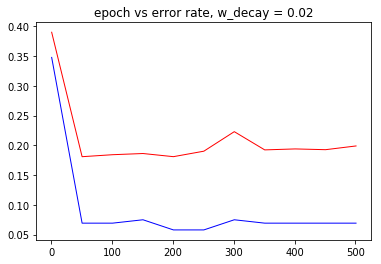

In [381]:
plt.plot('x', 'ytest', data=df1, marker='', color='red', linewidth=1)
plt.plot('x', 'ytrain', data=df1, marker='', color='blue', linewidth=1)
plt.title("epoch vs error rate, w_decay = 0.02")
plt.show()

In [242]:
x =[]
etest = []
etrain = []
for epoch in range(1, 550, 50):
    nns= list()
    x.append(epoch)
    nns = set_NN(n_in, n_out, 6)
    train_err = train_NN(nns, data, train_y, 0.1, 0.002, epoch, n_out)
    etrain.append(train_err)
    for l in nns:
        for n in l:
            del n['y']
            del n['delta']
    for i in range(len(data_test)):
        yi = forward_propg(nns, data_test[i])
        y_hat = yi.index(max(yi))
        if (test_y[i] == 0):
            yh0 = 1+ yh0
        if (test_y[i] == 1):
            yh1 = 1+ yh1
        if(test_y[i] != y_hat):
            if (test_y[i] == 1):
                y0 = 1 + y0
            else:
                y1 = 1+ y1 
    test_error = (y0+y1)/(yh0+yh1)
    etest.append(test_error)
    
df2=pd.DataFrame({'x': x, 'ytest': etest, 'ytrain': etrain })

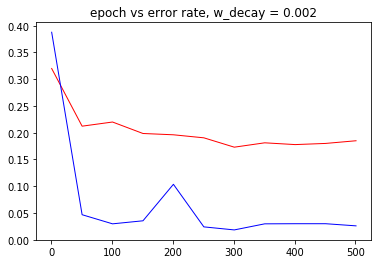

In [392]:
plt.plot('x', 'ytest', data=df2, marker='', color='red', linewidth=1)
plt.plot('x', 'ytrain', data=df2, marker='', color='blue', linewidth=1)
plt.title("epoch vs error rate, w_decay = 0.002")
plt.show()

In [244]:
x =[]
etest = []
etrain = []
for epoch in range(1, 550, 50):
    nns= list()
    x.append(epoch)
    nns = set_NN(n_in, n_out, 6)
    train_err = train_NN(nns, data, train_y, 0.1, 0.05, epoch, n_out)
    etrain.append(train_err)
    for l in nns:
        for n in l:
            del n['y']
            del n['delta']
    for i in range(len(data_test)):
        yi = forward_propg(nns, data_test[i])
        y_hat = yi.index(max(yi))
        if (test_y[i] == 0):
            yh0 = 1+ yh0
        if (test_y[i] == 1):
            yh1 = 1+ yh1
        if(test_y[i] != y_hat):
            if (test_y[i] == 1):
                y0 = 1 + y0
            else:
                y1 = 1+ y1 
    test_error = (y0+y1)/(yh0+yh1)
    etest.append(test_error)
    
df3=pd.DataFrame({'x': x, 'ytest': etest, 'ytrain': etrain })

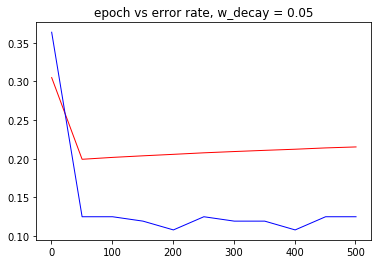

In [428]:
df3
plt.plot('x', 'ytest', data=df3, marker='', color='red', linewidth=1)
plt.plot('x', 'ytrain', data=df3, marker='', color='blue', linewidth=1)
plt.title("epoch vs error rate, w_decay = 0.05")
plt.show()

In [246]:
x =[]
etest = []
etrain = []
for epoch in range(1, 550, 50):
    nns= list()
    x.append(epoch)
    nns = set_NN(n_in, n_out, 6)
    train_err = train_NN(nns, data, train_y, 0.1, 0.0005, epoch, n_out)
    etrain.append(train_err)
    for l in nns:
        for n in l:
            del n['y']
            del n['delta']
    for i in range(len(data_test)):
        yi = forward_propg(nns, data_test[i])
        y_hat = yi.index(max(yi))
        if (test_y[i] == 0):
            yh0 = 1+ yh0
        if (test_y[i] == 1):
            yh1 = 1+ yh1
        if(test_y[i] != y_hat):
            if (test_y[i] == 1):
                y0 = 1 + y0
            else:
                y1 = 1+ y1 
    test_error = (y0+y1)/(yh0+yh1)
    etest.append(test_error)
    
df4=pd.DataFrame({'x': x, 'ytest': etest, 'ytrain': etrain })

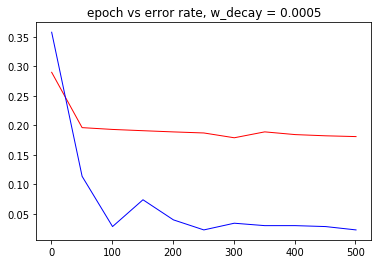

In [435]:
df4
plt.plot('x', 'ytest', data=df4, marker='', color='red', linewidth=1)
plt.plot('x', 'ytrain', data=df4, marker='', color='blue', linewidth=1)
plt.title("epoch vs error rate, w_decay = 0.0005")
plt.show()

In [436]:
x =[]
etest = []
etrain = []
for n in range(1, 20, 1):
    nns= list()
    x.append(n)
    nns = set_NN(n_in, n_out, n)
    train_err = train_NN(nns, data, train_y, 0.1, 0, 50, n_out)
    etrain.append(train_err)
    for l in nns:
        for n in l:
            del n['y']
            del n['delta']
    for i in range(len(data_test)):
        yi = forward_propg(nns, data_test[i])
        y_hat = yi.index(max(yi))
        if (test_y[i] == 0):
            yh0 = 1+ yh0
        if (test_y[i] == 1):
            yh1 = 1+ yh1
        if(test_y[i] != y_hat):
            if (test_y[i] == 1):
                y0 = 1 + y0
            else:
                y1 = 1+ y1 
    test_error = (y0+y1)/(yh0+yh1)
    etest.append(test_error)
    
df5=pd.DataFrame({'x': x, 'ytest': etest, 'ytrain': etrain })

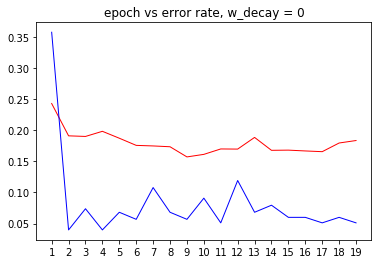

In [511]:
plt.plot('x', 'ytest', data=df5, marker='', color='red', linewidth=1)
plt.plot('x', 'ytrain', data=df5, marker='', color='blue', linewidth=1)
plt.xticks(np.arange(1,20,1))
plt.title("epoch vs error rate, w_decay = 0")
plt.show()